<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Diplomado en Ciencia de Datos</center></span>

# <span style="color:green"><center>Regresión Lineal en Python</center></span>

## <span style="color:#4361EE">Profesores</span>

* Alvaro  Montenegro, PhD, <ammontenegrod@unal.edu.co>
* Campo Elías Pardo, PhD, <cepardot@unal.edu.co>
* Daniel  Montenegro, Msc, <dextronomo@gmail.com>
* Camilo José Torres Jiménez, Msc, <cjtorresj@unal.edu.co>

## <span style="color:#4361EE">Asesora Medios y Marketing digital</span>

* Maria del Pilar Montenegro, pmontenegro88@gmail.com
* Jessica López Mejía, jelopezme@unal.edu.co

## <span style="color:#4361EE">Jefe Jurídica</span>

* Paula Andrea Guzmán, guzmancruz.paula@gmail.com

## <span style="color:#4361EE">Coordinador Jurídico</span>

* David Fuentes, fuentesd065@gmail.com

## <span style="color:#4361EE">Desarrolladores Principales</span>

* Dairo Moreno, damoralesj@unal.edu.co
* Joan Castro, jocastroc@unal.edu.co
* Bryan Riveros, briveros@unal.edu.co
* Rosmer Vargas, rovargasc@unal.edu.co
* Venus Puertas, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Expertos en Bases de Datos</span>

* Giovvani Barrera, udgiovanni@gmail.com
* Camilo Chitivo, cchitivo@unal.edu.co

## <span style="color:blue">Contenido</span>

- [Introduccion](#Introducción)
- [Importamos la librerías que usaremos](#Importamos-la-librerías-que-usaremos)
- [Lectura y documentación de los datos](#Lectura-y-documentación-de-los-datos)
- [Análisis exploratorio inicial](#Análisis-exploratorio-inicial)
- [Regresión Lineal Simple. Mínimos Cuadrados](#Regresión-Lineal-Simple.-Mínimos-Cuadrados)
- [Regresión Lineal Simple. Librería Sklearn](#Regresión-Lineal-Simple.-Librería-Sklearn)
- [Regresión Lineal Múltiple](#Regresión-Lineal-Múltiple)

## <span style="color:blue">Introducción</span>

[Basado en Regresión Lineal - Colab](https://colab.research.google.com/github/RFajardoMonzon/MachineLearningCourse/blob/master/Linear_regression_Regresi%C3%B3n_Lineal.ipynb#scrollTo=p5PAhkSzbkRi)

En esta lección hacemos una primera práctica de modelamiento con un subconjunto muy famoso de datos: El Boston Housing Dataset. 

El propósito del ejercicio es predecir el valor de las casas en Boston, basados en 13 variables (features) que se cree estań asociadas al precio. Son 506 registros.

## <span style="color:blue">Importamos la librerías que usaremos</span>

In [2]:
# Importamos la librería SKLearn, que trae bastantes funcionalidades de Machine
# Learning.
import sklearn as skl
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt

## <span style="color:blue">Lectura y documentación de los datos</span>

```
 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
```

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
Y = target = raw_df.values[1::2, 2]

In [ ]:
# Guardamos información de las dimensiones de nuestro dataset. Recuerda: 
# n = número de ejemplos que tenemos de nuestros datos y
# p = número de características que tenemos de cada datos.
n, p = X.shape
print(n, p)

## <span style="color:blue">Análisis exploratorio inicial</span> 

Hoy nos centraremos en modelar la relación existente entre las variables **RM** (Número medio de habitaciones) y **MEDV** (Valor medio de la vivienda). 

In [ ]:
rm = X[:, 5] # Variable: Número de habitaciones
# En la variable Y está: Valor medio de la variable

Vamos a primero comenzar entendiendo la naturaleza de nuestros datos, realizando un análisis exploratorio preliminar. Recuerde, aquí hacemos uso de las herramientas estadísticas y matemáticas aprendidas para obtener una mejor imagen de lo que los datos representan. 

- **¿Qué preguntas se quieren responder con estas herramientas?**

---


1.  **¿Existe algún relación entre la variable RM y MEDV?** Demuestrar la existencia de dicha relación desde dos vertientes diferentes: grafica un *scatter plot* con cada variable en un eje que te permita visualizar algún patrón identificable. También, utilizar una medida estadística como la correlación entre dos variables r para comprobar cuantitativamente dicha relación. ¿Son coherentes ambos análisis?¿Es coherente con lo que se puede esperar de manera intuitiva?

2.   **¿Cúal es el precio medio de las viviendas cuyo número medio de habitaciones oscila entre 5 y 6?** Aquí nos podemos apoyar en la función ***np.logical_and()*** que sirve para combinar dos condiciones diferentes.

3. **¿Se identifica algún fenómeno anómalo en la distribución de los datos?** Realizar un histograma para la variable MEDV. Aquí se recomienda utilizar un valor elevado de *bins*, por encima de 100, para remarcar el efecto de la anomalía. ¿De qué se trata?¿Cree que se trata de mediciones reales o es fruto de un preprocesamiento previo de los datos?

**Consejo:** cuando al hacer un *scatter plot* haya una gran acumulación de puntos en una zona de la gráfica que no te permita identificar la densidad de puntos que hay, es una buena idea añadir algo de transparencia al color de dichos puntos. Esto se consigue con el atributo ***alpha*** de la función*** plot()***

Aquí van los primeros códigos.

In [14]:
def relation_rm_medv(rm, means):
  plt.scatter(rm, means, alpha=0.25)
  plt.title("RM contra MEDV")
  plt.show()
  return np.corrcoef(rm, means)[0, 1]   #  se recibe uma matriz de correlaciones. Se xtrae la correlación
  
def price_mean(rm, means):
  filtered_means = means[np.logical_and(rm > 5, rm < 6)]
  return np.mean(filtered_means) * 1000

def medv_hist(medv):
  plt.hist(medv, bins=500)
  plt.show()

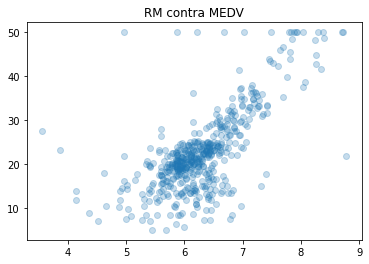

La correlación de RM y MEDV es: 0.6953599470715393
La media de las viviendas con un número de viviendas entre 5 y 6 es: 17551.5923566879


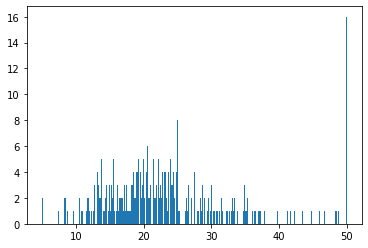

In [15]:
print("La correlación de RM y MEDV es:", relation_rm_medv(rm, Y))
print("La media de las viviendas con un número de viviendas entre 5 y 6 es:", price_mean(rm, Y))
medv_hist(Y)

## <span style="color:blue">Regresión Lineal Simple. Mínimos Cuadrados</span> 

Una vez hemos efectuado el análisis exploratorio inicial, vamos a proceder a implementar y entrenar a nuestro modelo. Recuerde que podemos conseguir ajustar a los datos a una recta de regresión lineal haciendo uso de aquellos valores de los parámetros obtenidos mediante el método de ***Mínimos Cuadrados Ordinarios***. Este método encuentra que el mínimo de la función del ***Error Cuadrático Medio*** se encuentra en el punto donde su derivada es igual a 0. Esto se obtiene evaluando la siguiente expresión:

$$
w = (X^TX)^{-1}X^TY
$$

Para poder trabajar de forma vectorizada, ampliamos la matriz $X$ con una primera columna de valores asignados a $1$, que servirán para mantener al termino independiente.

---

**Lo que vamos a hacer:** 

1.  Ajustar un modelo de regresión iineal mediante el método de ***Mínimos Cuadrados Ordinarios***.
2.  Una vez calculados los parámetros, visualizamos la recta obtenida para comprobar que realmente se ajusta a la nube de puntos.
3.  ¿Qué representa $w_0$?¿Y $w_1$?
4.  Utilizaremos el modelo entrenado para predecir cuál será el valor medio de la vivienda para un número medio de ***9 habitaciones***, y también el número de habitaciones medio que podría tener una vivienda cuyo valor medio es de **45.000**.
5.   Utilizaremos el modelo entrenado para calcular, para cada valor de $X$, cual es el valor predicho por la regresión. Llamaremos al vector generado el vector de salida predicho $\tilde{Y}$. 
6. Luego vamos a evaluar la calidad de las predicciones implementando una función a la que le pasemos como parámetros el vector de valores de salida reales $Y$ y el vector de salida predicho $\tilde{Y}$, para calcular el ***Error Cuadrático Medio***. Recuerda que  el ***ECM*** se calcula como:

$$
\operatorname{ECM}=\frac{1}{n}\sum_{i=1}^n(Y_{Pi} - Y_i)^2. 
$$

**Nota.** Vamos a utilizar el operador @ como un operador equivalente a la función **np.matmul()**, utilizada para la multiplicación matricial. ej : A = B @ C. Realmente, el operador @ implementa de manera general el producto tensorial en Python.

**Consejo:** Al trabajar con multiplicación de matrices y vectores, compruebe que los vectores tengan bien definidas sus dos dimensiones. Esto se puede ver usando con el atributo *X.shape* de dicho vector. Queremos que sus dimensiones se muestren así **(5, 1)** y no así **(5,)**.


Esto se puede producir por ejemplo cuando seleccionamos una única columna de una matriz. En estos casos se puede evitar seleccionando dicha columna así **X[:, 3:4]** en vez de así **X[:, 3]**. Igualmente, en caso de haber perdido una de las dimensiones, las funciones **np.newaxis()** o **reshape()** le pueden ser de ayuda.

```
ej: Y = Y[:, np.newaxis]
```
**Info:** En el punto 5 hemos calcularemos el error del modelo utilizando todos los datos. Más adelante en el diplomado veremos que esto no es del todo correcto a la hora de evaluar un modelo, pero de momento es suficiente.

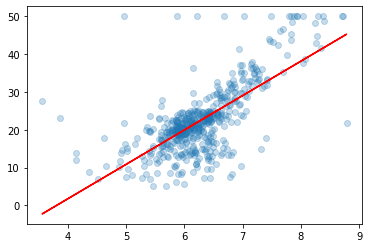

w =  [-34.67062078   9.10210898]
Predicción precio con 9 cuartos: $ 47248.36
Predicción del número de cuartos para un precio de $45.000:  8.75
ECM:  43.6


In [35]:
def lineal_regression(x, means):
#   W = (Xt*X)^-1 * Xt*Y 
  w = np.linalg.inv(x.T @ x) @ x.T @ Y
  plt.scatter(rm, means, alpha=0.25)
  plt.plot(rm, x @ w, color="red")
  plt.show()
  return w, x @ w
  
def predict_from_room_number(room_number, w):
  return (w[0] + w[1] * room_number) * 1000
  
def predict_from_price(price, w):
  return (price/1000 - w[0]) / w[1]
  
def get_mse(yp, y):
  return np.mean(np.square(np.subtract(yp, y)))
    

w, yp = lineal_regression(np.c_[np.ones(rm.shape[0]), rm], Y) # np._c concatena a lo largo del segundo eje
print('w = ', w)
print('Predicción precio con 9 cuartos: $',np.round(predict_from_room_number(9, w),2))
print('Predicción del número de cuartos para un precio de $45.000: ', np.round(predict_from_price(45000, w),2))
print('ECM: ',np.round(get_mse(yp, Y),2))
 


## <span style="color:blue">Regresión Lineal Simple. Librería Sklearn</span>  


Hasta este punto hemos usado losa conceptos teóricos y prácticos de cómo funciona el modelo de regresión lineal simple y cómo se implementa internamente. Esto está muy bien para tener un mejor conocimiento de los conceptos. Sin embargo, en el día a día tenemos que ser efectivos, y para eso lo habitual será utilizar librerías que ya implementen tales los modelos. 

Por ejemplo, la librería **Sklearn** ya implementa muchos de los modelos de Machine Learning el modelo de regresión lineal. 

---
Usaremos a continuación la función *sklearn.linear_model.LinearRegression()* para entrenar un modelo de regresión lineal simple con las mismas variables que hemos utilizado en el ejercicio anterior. 

Por favor revise la documentación (online o usando el comando "?") para estudiar los diferentes parámetros que acepta este modelo. 

Por ejemplo ¿Para qué sirve el parámetro *fit_intercept*? 

Se puede entrenar el modelo con y sin dicho parámetro y visualizarlo en una gráfica.

Una vez ajustado el modelo, compruebaremos que el valor de los parámetros obtenidos (también llamados coeficientes) es el mismo que se  obtuvi anteriormente. De la misma forma, utiliza la función *.predict()*, que ya viene implementada, para comprobar que las predicciones son las mismas de antes. 

Finalmente, se comprueba que el valor del Error Cuadrático Medio que se ha obtenido previamente  es igual al que proporciona la función ya implementada *sklearn.metrics.mean_squared_error()*. 

Veamos.

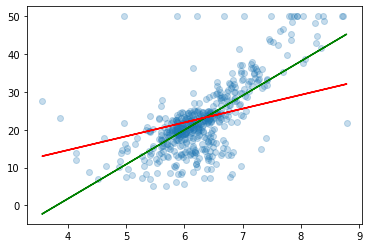

Modelo con fit_intercept: w1 = 9.102108981180308 w0 = -34.670620776438554 mse = 43.60055177116956
Modelo sin fit_intercept: w1 = 3.6533504000238834 w0 = 0.0 mse = 58.41063543210173


In [36]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#rm.reshape(-1, 1) cambia las dimensiones de rm, de tal manera que la segunda dimensión es 1. 
# el -1 indica a Python que recalcule la primera dimensión.
# En resumen, tranforma el vector rm en una matriz de tamaño n*1.
def use_sklearn():
  model = linear_model.LinearRegression().fit(rm.reshape(-1, 1), Y)
  model_2 = linear_model.LinearRegression(fit_intercept=False).fit(rm.reshape(-1, 1), Y)

  yp = model.predict(rm.reshape(-1, 1))
  yp2 =  model_2.predict(rm.reshape(-1, 1))

  plt.plot(rm, yp, color="green")
  plt.plot(rm, yp2, color="red")
  plt.scatter(rm, Y, alpha=0.25)
  plt.show()
  
  fit_intercept_error = mean_squared_error(Y, yp)

  print("Modelo con fit_intercept: w1 =", model.coef_[0], "w0 =",
        model.intercept_, "mse =", fit_intercept_error)
  print("Modelo sin fit_intercept: w1 =", model_2.coef_[0], "w0 =",
        model_2.intercept_, "mse =", mean_squared_error(Y, yp2))
  
use_sklearn()


## <span style="color:blue">Regresión Lineal Múltiple</span>  

Por último, como ya hemos visto, podemos generalizar el modelo de regresión lineal simple añadiendo más variables y obteniendo así el model de regresión lineal múltiple. Al añadir más variables al modelo, le estamos dotando de más información que ayude a mejorar las predicciones. Por ejemplo, un modelo de regresión lineal simple podría intentar predecir la altura de una persona en base al tamaño de la mano. Pero si añadieramos otra variable, como por ejemplo, el género, podríamos tener más información para hacer predicciones más fidedignas.

La buena noticia es que a nivel de código, no hay gran diferencia entre ambos modelos, que también pueden ser resueltos mediante el método de ***Mínimos Cuadrados Ordinarios*** evaluando la expresión que ya conocemos:

$$
W = (X^TX)^{-1}X^TY
$$


Veamos.

In [37]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


def user_weights(x):
  return np.linalg.inv(x.T @ x) @ x.T @ Y

x = np.c_[np.ones(rm.shape[0]), rm, X[:, [-1, -3]]]
w = user_weights(x)
print('Coeficientes "a mano":', w) # El primero es el valor resultante cuando el resto de variables son 0, el resto es la importancia (peso) de cada variable.

# Quitamos la columna de unos

x = x[:, 1:]
model = linear_model.LinearRegression().fit(x, Y)
print("Coeficientes sklearn:", model.intercept_, model.coef_)

print("Error regresión lineal múltiple:", mean_squared_error(Y, model.predict(x)))
print("Error regresión lineal simple:", get_mse(yp, Y))



Coeficientes "a mano": [18.56711151  4.51542094 -0.57180569 -0.93072256]
Coeficientes sklearn: 18.567111505395246 [ 4.51542094 -0.57180569 -0.93072256]
Error regresión lineal múltiple: 27.130405758497062
Error regresión lineal simple: 43.60055177116956
